In [65]:
from scipy.stats import binom
import numpy as np

from empiricaldist import Pmf

import pandas as pd
import matplotlib.pyplot as plt


Uma moeda justa terá 50% de probabilidade de cair em um lado se você rodar duas vezes terá 4 outcomes possiveis (todos com 25%).

* HH
* HT
* TH
* TT

Se pensarmos exclusivamente no H, temos três possibilidades: sair 0 (25%), sair 1(25%), sair 2 (50%)

In [44]:
#Rodando 2 moedas qual é chance de conseguirmos 1 cara?
n = 2
p = 0.5
k = 1

binom.pmf(k,n,p)

0.5

In [46]:
#Agora vamos passar 3k diferentes, a chance de tirar 0,1,2 carasss
ks = np.arange(n+1)

ps = binom.pmf(ks,n,p)

for outcome, prob in zip(ks,ps):
    print(f'{outcome}:{prob}')

0:0.25
1:0.5
2:0.25


In [53]:
#Usando a biblioteca Probability Mass Function
pmf_k = Pmf(ps,ks)
pmf_k

,probs
0,0.25
1,0.50
2,0.25


In [74]:
def make_binomial(n,p):
    """"Make a binomial Pmf."""
    ks = np.arange(n+1)
    ps = binom.pmf(ks,n,p)
    return Pmf(ps,ks)

## Moeda viciada?
When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110. “It looks very suspicious to me,” said Barry Blight, a statistics lecturer at the London School of Economics. “If the coin were unbiased, the chance of getting a result as extreme as that would be less than 7%.”

But do these data give evidence that the coin is biased rather than fair?

In [57]:
pmf_k = make_binomial(n=250, p=0.50)

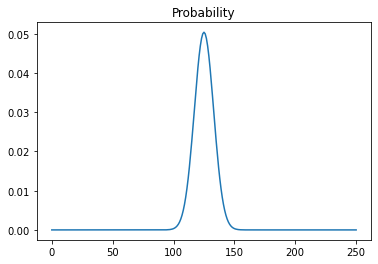

In [68]:
pmf_k.plot.line()
plt.title('Probability')
plt.show()

In [70]:
#Resultado mais provavel
pmf_k.max_prob()

125

In [72]:
#Chance do resultado mais provavel acontecer
pmf_k[125]

0.05041221314731537

In [73]:
#Chance de rodar 140 caras
pmf_k[140]

0.008357181724917673